In [490]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('dark_background')

In [491]:
df = pd.read_csv('bank_data_clean_v2.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,no,0.628208,yes,no,cellular,0.133333,may,0.505508,0.0,0.0,0.0,failure,no
1,0.337662,technician,single,secondary,no,0.281055,yes,no,telephone,0.133333,may,0.291939,0.0,0.0,0.0,success,no
2,0.194805,entrepreneur,married,secondary,no,0.276621,yes,yes,cellular,0.133333,may,0.146323,0.0,0.0,0.0,success,no
3,0.220779,management,married,tertiary,no,0.314227,yes,no,cellular,0.133333,may,0.268640,0.0,0.0,0.0,success,no
4,0.129870,management,single,tertiary,no,0.349697,yes,yes,cellular,0.133333,may,0.420080,0.0,0.0,0.0,failure,no


In [492]:
df.shape

(43354, 17)

#### Before clustering i'll encode each categorical variable.

In [493]:
categorical_var_names = list(set(df.columns) - set(df.select_dtypes(include=np.number).columns))
categorical_var_names.remove('y')
categorical_var_names

['month',
 'contact',
 'poutcome',
 'loan',
 'default',
 'job',
 'marital',
 'education',
 'housing']

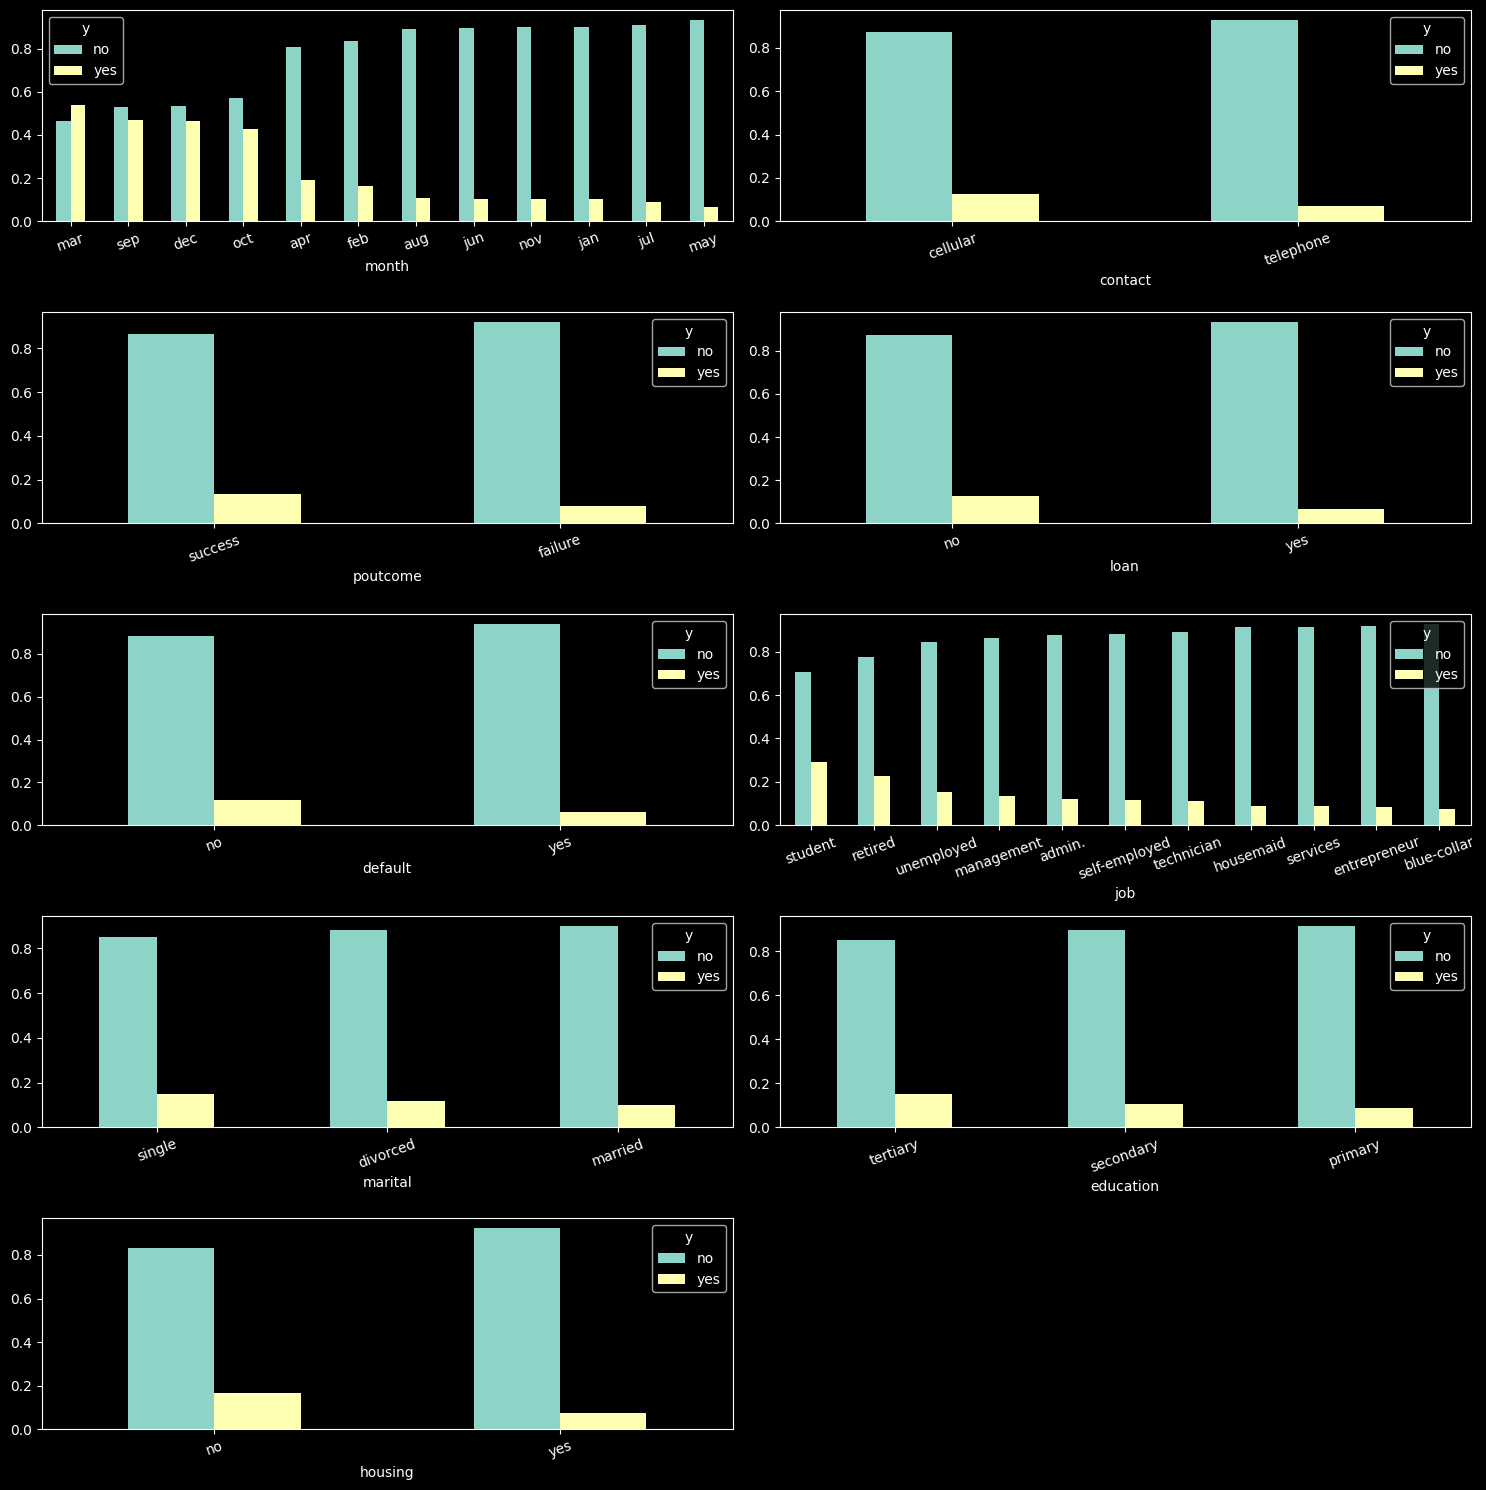

In [494]:
crosstabs = [     
    (pd.crosstab(index=df.get(var_name), columns=df['y'], normalize='index').sort_values('yes', ascending=False), var_name) for var_name in categorical_var_names 
]

fig, ax = plt.subplots(5, 2, figsize=(15, 15), tight_layout=True)

plt.subplots_adjust(bottom=0.01, wspace=0.5)
fig.tight_layout(pad=5)

for crosstab, ax_i in zip(crosstabs, ax.flatten()):
    crosstab[0].plot.bar(ax=ax_i, rot=20)

fig.delaxes(ax[4][1])

In [495]:
for crosstab in crosstabs:
    print(crosstab[1])

month
contact
poutcome
loan
default
job
marital
education
housing


In [496]:
mappings = dict()

for crosstab in crosstabs:
    
    mappings[crosstab[1]] = dict()
    values = list(crosstab[0].index)
    
    for i, value in enumerate(values):
        mappings[crosstab[1]][value] = len(values) -1 - i

mappings

{'month': {'mar': 11,
  'sep': 10,
  'dec': 9,
  'oct': 8,
  'apr': 7,
  'feb': 6,
  'aug': 5,
  'jun': 4,
  'nov': 3,
  'jan': 2,
  'jul': 1,
  'may': 0},
 'contact': {'cellular': 1, 'telephone': 0},
 'poutcome': {'success': 1, 'failure': 0},
 'loan': {'no': 1, 'yes': 0},
 'default': {'no': 1, 'yes': 0},
 'job': {'student': 10,
  'retired': 9,
  'unemployed': 8,
  'management': 7,
  'admin.': 6,
  'self-employed': 5,
  'technician': 4,
  'housemaid': 3,
  'services': 2,
  'entrepreneur': 1,
  'blue-collar': 0},
 'marital': {'single': 2, 'divorced': 1, 'married': 0},
 'education': {'tertiary': 2, 'secondary': 1, 'primary': 0},
 'housing': {'no': 1, 'yes': 0}}

In [497]:
for var_name in categorical_var_names:
    df[var_name] = df[var_name].map(mappings[var_name])
    
df['y'] = df.y.map({'no': 0, 'yes': 1})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,7,0,2,1,0.628208,0,1,1,0.133333,0,0.505508,0.0,0.0,0.0,0,0
1,0.337662,4,2,1,1,0.281055,0,1,0,0.133333,0,0.291939,0.0,0.0,0.0,1,0
2,0.194805,1,0,1,1,0.276621,0,0,1,0.133333,0,0.146323,0.0,0.0,0.0,1,0
3,0.220779,7,0,2,1,0.314227,0,1,1,0.133333,0,0.268640,0.0,0.0,0.0,1,0
4,0.129870,7,2,2,1,0.349697,0,0,1,0.133333,0,0.420080,0.0,0.0,0.0,0,0


#### Encoding the categorical data based on their order w.r.t y

In [498]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[categorical_var_names])
df[categorical_var_names] = scaled
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,0.7,0.0,1.0,1.0,0.628208,0.0,1.0,1.0,0.133333,0.0,0.505508,0.0,0.0,0.0,0.0,0
1,0.337662,0.4,1.0,0.5,1.0,0.281055,0.0,1.0,0.0,0.133333,0.0,0.291939,0.0,0.0,0.0,1.0,0
2,0.194805,0.1,0.0,0.5,1.0,0.276621,0.0,0.0,1.0,0.133333,0.0,0.146323,0.0,0.0,0.0,1.0,0
3,0.220779,0.7,0.0,1.0,1.0,0.314227,0.0,1.0,1.0,0.133333,0.0,0.268640,0.0,0.0,0.0,1.0,0
4,0.129870,0.7,1.0,1.0,1.0,0.349697,0.0,0.0,1.0,0.133333,0.0,0.420080,0.0,0.0,0.0,0.0,0


In [499]:
df.y.value_counts()

0    38317
1     5037
Name: y, dtype: int64

##### I'll up-sample the minority class in y so that the models dont create bias over class 0

In [500]:
from sklearn.utils import resample

df_majority = df[df.y == 0]
df_minority = df[df.y == 1]

df_minority_upsampled = resample(
    df_minority, 
    replace=True, 
    n_samples=len(df_majority),
    random_state=123
)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [501]:
df_upsampled.y.value_counts()

0    38317
1    38317
Name: y, dtype: int64

In [502]:
df = df_upsampled

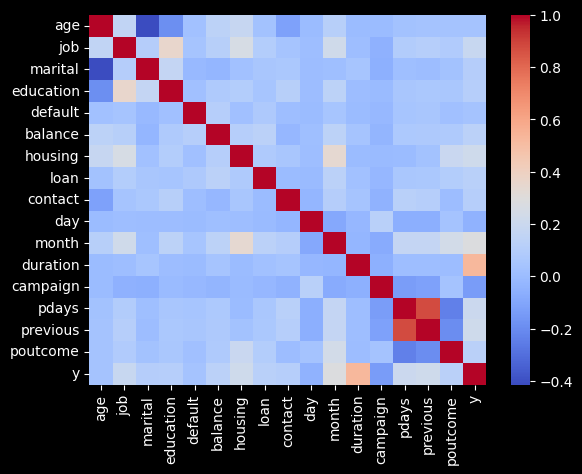

In [503]:
corr_mat = sns.heatmap(df.corr(), cmap='coolwarm')

#### Because the algorithms below are very costly i'll use 20% of the data to speed things up

In [504]:
df.shape

(76634, 17)

In [505]:
df = df.sample(frac=1)  # shuffle df
df = df.sample(frac=0.2, random_state=42, replace=False)
df.shape

(15327, 17)

### Feature Selection

#### Sorting features based on how high their correletion with y is

In [542]:
ix = df.corr().sort_values('y', ascending=False).index
df_sorted = df.loc[:, ix]

num_of_feats = 6

corr_based_feats = list(df_sorted.columns[1:num_of_feats + 1])
corr_based_feats

['duration', 'month', 'housing', 'previous', 'pdays', 'job']

In [529]:
column_stoi = { column_name: i for i, column_name in enumerate(list(df.columns)) }
column_itos = { i: column_name for column_name, i in column_stoi.items() }
column_stoi, column_itos

({'age': 0,
  'job': 1,
  'marital': 2,
  'education': 3,
  'default': 4,
  'balance': 5,
  'housing': 6,
  'loan': 7,
  'contact': 8,
  'day': 9,
  'month': 10,
  'duration': 11,
  'campaign': 12,
  'pdays': 13,
  'previous': 14,
  'poutcome': 15,
  'y': 16},
 {0: 'age',
  1: 'job',
  2: 'marital',
  3: 'education',
  4: 'default',
  5: 'balance',
  6: 'housing',
  7: 'loan',
  8: 'contact',
  9: 'day',
  10: 'month',
  11: 'duration',
  12: 'campaign',
  13: 'pdays',
  14: 'previous',
  15: 'poutcome',
  16: 'y'})

#### Using RFE:

In [558]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

vals = df.values
feats = vals[:, 0:]
labels = vals[:, column_stoi['y']]

model_check = LogisticRegression(solver='lbfgs')

rfe = RFE(estimator=model_check, n_features_to_select=num_of_feats).fit(feats, labels)

rfe_based_feats = sorted([ (i, column_itos[i]) for i in rfe.ranking_ ], reverse=False, key=lambda x:x[0])
rfe_based_feats = [ x[1] for x in list(dict.fromkeys(rfe_based_feats)) ][:num_of_feats]    # removing duplicates

rfe_based_feats

['job', 'marital', 'education', 'default', 'balance', 'housing']

##### RFE chose: job, marital, education, default, balance, housing as the top 6 features

#### Using ExtraTreesClassifier

In [563]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=10)
etc.fit(feats, labels)
etc_based_feats = sorted([ (column_itos[i], importance) for i, importance in enumerate(etc.feature_importances_) ], reverse=True, key=lambda x:x[1] )[1:num_of_feats + 1]
etc_based_feats = [ x[0] for x in etc_based_feats ]

etc_based_feats

['duration', 'pdays', 'housing', 'month', 'poutcome', 'loan']

#### ExtraTreesClassifier chose: duration, pdays, housing, month, poutcome, loadn as the top 6 features

#### PCA:

In [564]:
from sklearn.decomposition import PCA


def pca_transform(n_components, X):
    pca = PCA(n_components=n_components)
    X_embed = pca.fit_transform(X)
    return (X_embed, np.sum(pca.explained_variance_ratio_[:n_components]))

In [565]:
X_1, X_2, X_3 = df[corr_based_feats].values, df[rfe_based_feats].values, df[etc_based_feats].values
y = df['y'].values

(X_embed_1, evr_1), (X_embed_2, evr_2), (X_embed_3, evr_3) = pca_transform(5, X_1), pca_transform(5, X_2), pca_transform(5, X_3)

print(evr_1, evr_2, evr_3)

0.9788161896714492 0.9787432433140155 0.9376642964239699


#### We can see that 5 features are enough for ~98% of the variance (for X_1, X_2)

In [566]:
X_1, X_2, X_3 = X_embed_1, X_embed_2, X_embed_3
X_1.shape

(15327, 5)

<AxesSubplot:>

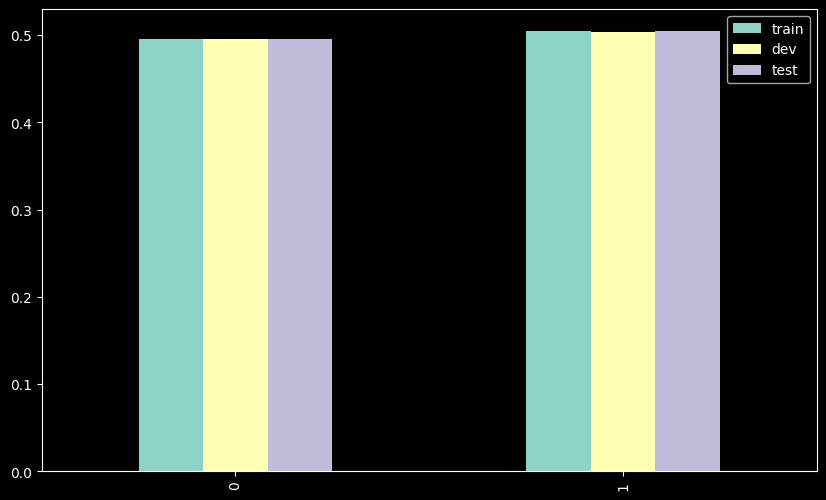

In [567]:
from sklearn.model_selection import train_test_split

ix = list(range(len(X)))
dev_size, test_size = 0.2, 0.1

dev_slice = dev_size + test_size
test_slice = test_size / dev_size

ix_train, ix_dev = train_test_split(ix, test_size=dev_slice, random_state=42, stratify=y)
ix_dev, ix_test = train_test_split(ix_dev, test_size=test_slice, random_state=42, stratify=y[ix_dev])

fig, ax = plt.subplots(1,1, figsize=(10,6))

pd.concat((
    pd.Series(y[ix_train]).value_counts(normalize=True).sort_index().rename('train'),
    pd.Series(y[ix_dev]).value_counts(normalize=True).sort_index().rename('dev'),
    pd.Series(y[ix_test]).value_counts(normalize=True).sort_index().rename('test')
), axis=1).plot.bar(ax=ax)

In [568]:
f'{X.shape=}, {y.shape=}'

'X_1.shape=(15327, 5), y.shape=(15327,)'

In [372]:
import itertools

combos = [ combo for combo in itertools.combinations(range(X.shape[1]),  2) ]
combos

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

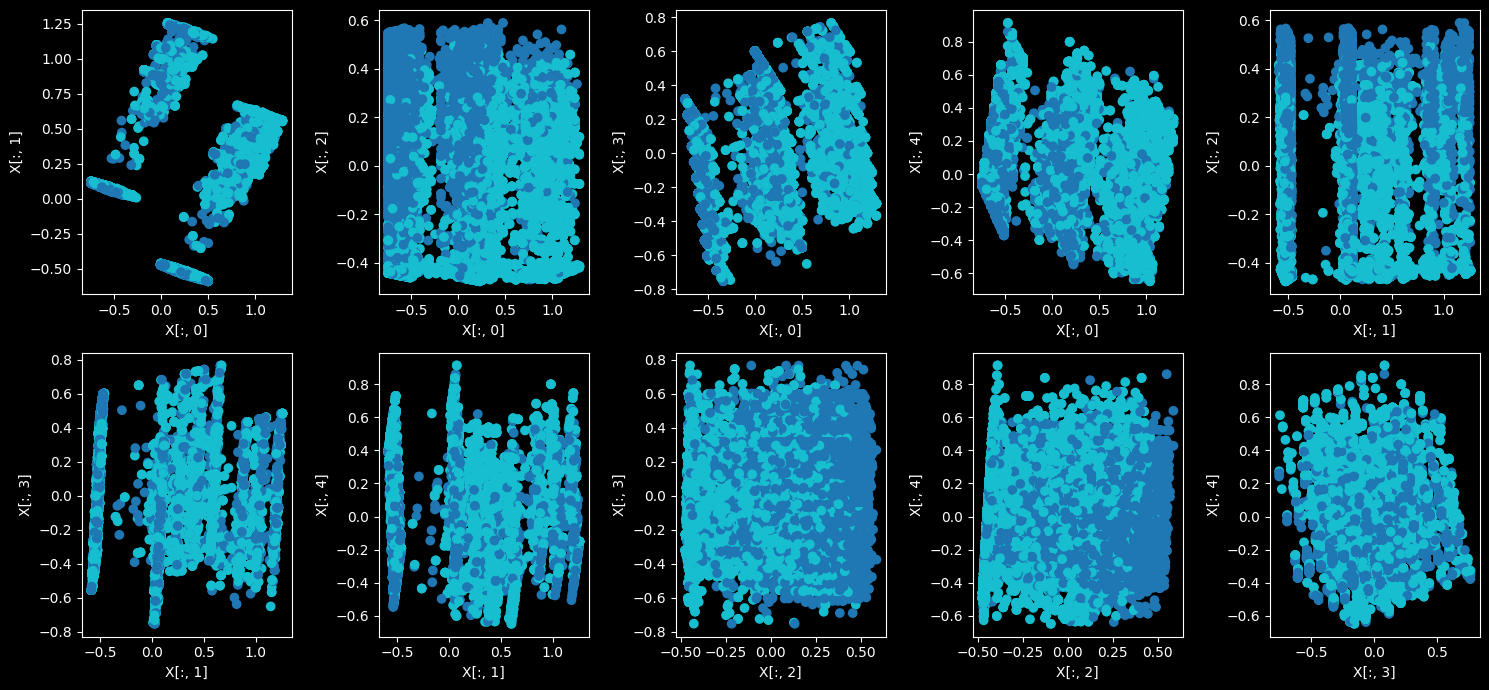

In [373]:
fig, ax = plt.subplots(2, 5, figsize=(15, 7), tight_layout=True)

for combo, ax_i in zip(combos, ax.flatten()):
    ax_i.scatter(X[:, combo[0]], X[:, combo[1]], c=y, cmap='tab10')
    ax_i.set_xlabel(f'X[:, {combo[0]}]')
    ax_i.set_ylabel(f'X[:, {combo[1]}]')

#### Since i might use the cluster labels from clustering as a new feature i'll train the clustering models only with the train slice of X

### K-Means

- ##### Initialization of centeroids method is random instead of kmeans++ to save up time
- ##### Distance function is euclidean
- ##### Model is evaluated using silhouette score.
- ##### Algorithm is elkan (because i test different K values and for each value i calculate the silhouette score elkan's use of the triangle inequality saves up a lot of distance between points calculations)

In [374]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 7)
kmeans_fits, kmeans_hist = [], []

for k in K:
    model = KMeans(n_clusters=k, init='k-means++', algorithm='elkan').fit(X)
    kmeans_fits.append(model)
    kmeans_hist.append( (k, silhouette_score(X, model.labels_, metric='euclidean')) )

In [375]:
kmeans_hist_df = pd.DataFrame(kmeans_hist, columns=['k', 'sil_score'])
kmeans_hist_df = kmeans_hist_df.sort_values('sil_score', ascending=False)
kmeans_hist_df

,k,sil_score
2,4,0.447373
1,3,0.409789
3,5,0.396584
4,6,0.355587
0,2,0.351870


In [376]:
def plot_clusters(ax, model):
    for combo, ax_i in zip(combos, ax.flatten()):
        ax_i.scatter(X[:, combo[0]], X[:, combo[1]], c=model.labels_, cmap='tab10')
        ax_i.set_xlabel(f'X[:, {combo[0]}]')
        ax_i.set_ylabel(f'X[:, {combo[1]}]')

In [377]:
kmeans_fits

[KMeans(algorithm='elkan', n_clusters=2),
 KMeans(algorithm='elkan', n_clusters=3),
 KMeans(algorithm='elkan', n_clusters=4),
 KMeans(algorithm='elkan', n_clusters=5),
 KMeans(algorithm='elkan', n_clusters=6)]

##### 2 clusters:

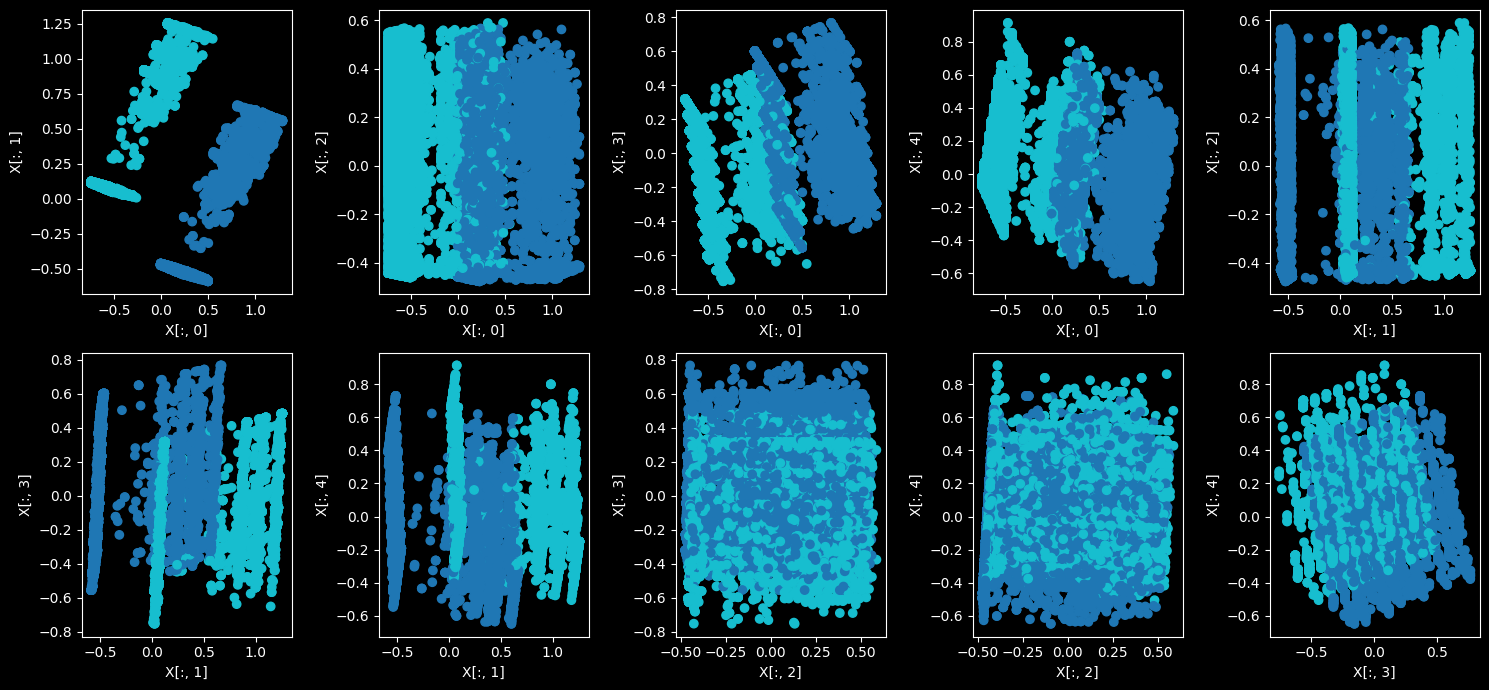

In [378]:
fig, ax = plt.subplots(2, 5, figsize=(15, 7), tight_layout=True)

plot_clusters(ax, kmeans_fits[0])

#### 4 clusters:

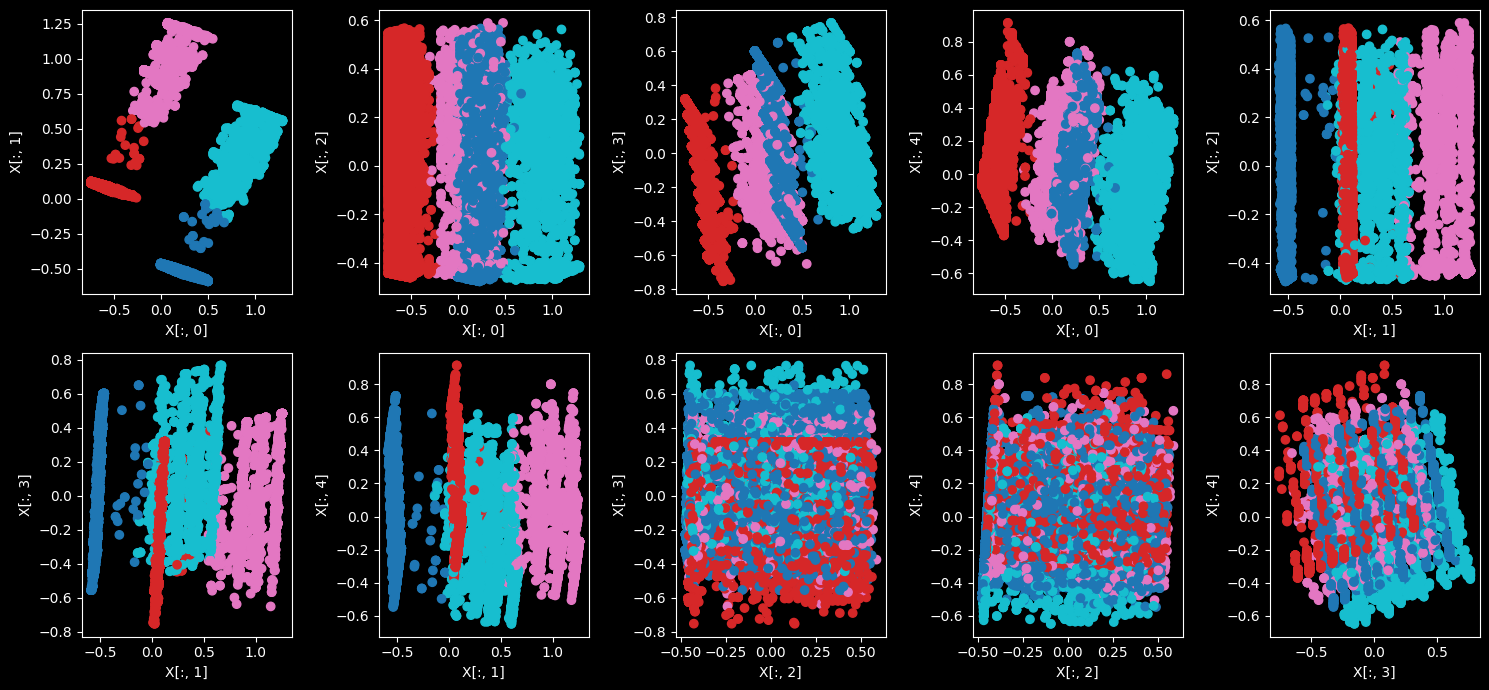

In [379]:
fig, ax = plt.subplots(2, 5, figsize=(15, 7), tight_layout=True)

plot_clusters(ax, kmeans_fits[2])

### DBSCAN

#### DBSCAN parameters:
- ##### for min_samples i'll try values >= to the dimensionality of X
- ##### for eps i'll use NearestNeighbors to find the average distance between each point and its n_neighbors
- ##### n_neighbors will be equal to min_samples

In [380]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import plotly.express as px


ngbrs = NearestNeighbors(n_neighbors=20)
ngbrs_fit = ngbrs.fit(X)
neigh_dist, neigh_indices = ngbrs.kneighbors(X)

# sorting distances in ascending order
neigh_dist = np.sort(neigh_dist, axis=0)
neigh_dist = neigh_dist[:,1]

#plt.plot(neigh_dist)   # not accurate enough
px.line(neigh_dist)

In [382]:
from sklearn.cluster import DBSCAN

eps_vals = np.linspace(0.09, 0.45, 5)
min_samples_vals = range(8, 13)

dbscan_fits = []
dbscan_hist = []

for eps in eps_vals:
    for min_samples in min_samples_vals:
        
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        dbscan_fits.append(dbscan_model)
        
        try:
            dbscan_hist.append( (eps, min_samples, silhouette_score(X, dbscan_model.labels_), len(np.unique(dbscan_model.labels_))) )
        except ValueError:      # occurs when dbscan assigns all data points to 1 cluster, silhouette score accepts number of clusters >= 2
            pass

In [383]:
dbscan_hist_df = pd.DataFrame(dbscan_hist, columns=['eps', 'min_samples', 'sil_score', 'clusters_num'])
dbscan_hist_df = dbscan_hist_df.sort_values('sil_score', ascending=False)
dbscan_hist_df.head(10)

,eps,min_samples,sil_score,clusters_num
12,0.27,10,0.442979,5
14,0.27,12,0.442262,5
13,0.27,11,0.442112,5
23,0.45,11,0.351870,2
22,0.45,10,0.351870,2
21,0.45,9,0.351870,2
20,0.45,8,0.351870,2
24,0.45,12,0.351870,2
10,0.27,8,0.347746,4
11,0.27,9,0.347746,4


In [384]:
dbscan_fits

[DBSCAN(eps=0.09, min_samples=8),
 DBSCAN(eps=0.09, min_samples=9),
 DBSCAN(eps=0.09, min_samples=10),
 DBSCAN(eps=0.09, min_samples=11),
 DBSCAN(eps=0.09, min_samples=12),
 DBSCAN(eps=0.18, min_samples=8),
 DBSCAN(eps=0.18, min_samples=9),
 DBSCAN(eps=0.18, min_samples=10),
 DBSCAN(eps=0.18, min_samples=11),
 DBSCAN(eps=0.18, min_samples=12),
 DBSCAN(eps=0.27, min_samples=8),
 DBSCAN(eps=0.27, min_samples=9),
 DBSCAN(eps=0.27, min_samples=10),
 DBSCAN(eps=0.27, min_samples=11),
 DBSCAN(eps=0.27, min_samples=12),
 DBSCAN(eps=0.36, min_samples=8),
 DBSCAN(eps=0.36, min_samples=9),
 DBSCAN(eps=0.36, min_samples=10),
 DBSCAN(eps=0.36, min_samples=11),
 DBSCAN(eps=0.36, min_samples=12),
 DBSCAN(eps=0.45, min_samples=8),
 DBSCAN(eps=0.45, min_samples=9),
 DBSCAN(eps=0.45, min_samples=10),
 DBSCAN(eps=0.45, min_samples=11),
 DBSCAN(eps=0.45, min_samples=12)]

#### Plotting KMeans vs DBSCAN clusters (first row is KMeans)

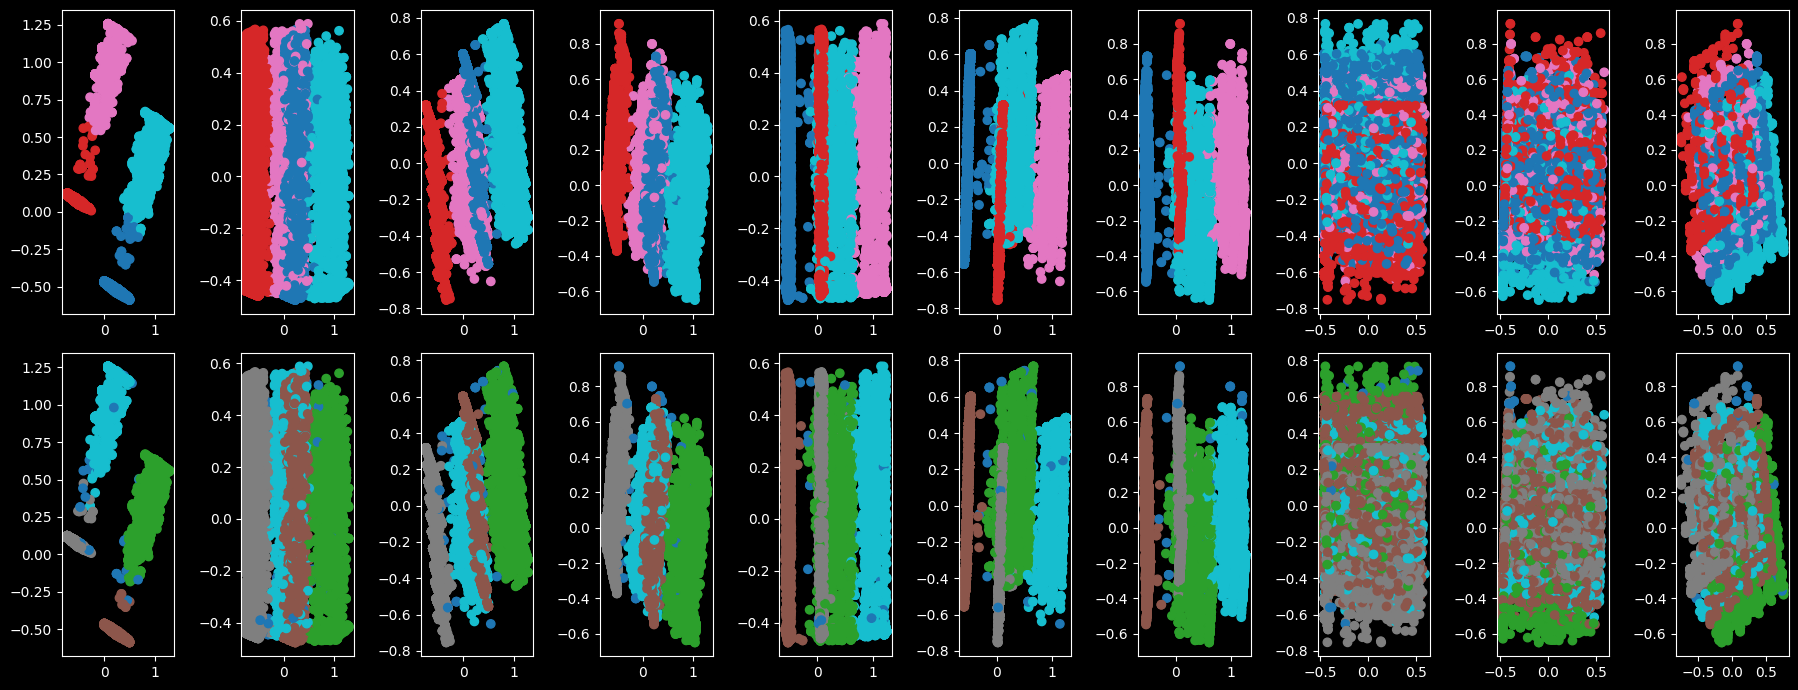

In [385]:
fig, ax = plt.subplots(2, 10, figsize=(18, 7), tight_layout=True)

dbscan_model = DBSCAN(eps=0.27, min_samples=10).fit(X)
kmeans_model = kmeans_fits[2]

for j, combo in enumerate(combos):
    ax[0][j].scatter(X[:, combo[0]], X[:, combo[1]], c=kmeans_model.labels_, cmap='tab10')

for j, combo in enumerate(combos):
    ax[1][j].scatter(X[:, combo[0]], X[:, combo[1]], c=dbscan_model.labels_, cmap='tab10')

#### DBSCAN agrees with KMeans about 4 clusters being the best (DBSCAN'S 5fth cluster is noise)

### I'll add the KMeans with k=4 model's labels to the X for predictions as well as DBSCAN model's clusters

In [388]:
kmeans_fits[2].labels_.shape

(15327,)

In [386]:
dbscan_model.labels_.shape

(15327,)

In [389]:
df[inputs].head()

,duration,month,housing,previous,pdays,job
40386,0.404548,0.727273,1.0,0.693538,1.000000,0.6
38402,0.148265,0.363636,1.0,0.000000,0.000000,0.7
33334,0.532690,0.000000,0.0,0.000000,0.000000,0.0
31394,1.000000,0.636364,0.0,0.000000,0.000000,0.6
39881,0.816154,0.909091,1.0,0.346769,0.679278,0.0


In [392]:
inputs_v2 = list(inputs)
inputs_v2.append('cluster_kmeans')
inputs_v2.append('cluster_dbscan')

df_v2 = pd.DataFrame(df)
df_v2['cluster_kmeans'] = kmeans_fits[0].labels_
df_v2['cluster_dbscan'] = dbscan_model.labels_
df_v2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_kmeans,cluster_dbscan
40386,0.103896,0.6,1.0,0.5,1.0,0.331798,1.0,1.0,1.0,0.933333,0.727273,0.404548,0.000000,1.000000,0.693538,1.0,1,0,0
38402,0.441558,0.7,0.0,1.0,1.0,0.276293,1.0,1.0,1.0,0.033333,0.363636,0.148265,0.411365,0.000000,0.000000,1.0,0,0,1
33334,0.155844,0.0,1.0,0.5,1.0,0.212248,0.0,1.0,1.0,0.133333,0.000000,0.532690,0.000000,0.000000,0.000000,1.0,0,1,2
31394,0.155844,0.6,1.0,0.5,1.0,0.287624,0.0,1.0,1.0,0.533333,0.636364,1.000000,0.000000,0.000000,0.000000,1.0,1,1,2
39881,0.246753,0.0,0.0,0.5,1.0,0.985871,1.0,1.0,1.0,0.233333,0.909091,0.816154,0.205683,0.679278,0.346769,1.0,0,0,0


In [394]:
len(inputs_v2)

8

In [396]:
X_v2 = df_v2[inputs_v2].values
print(f'{X_v2.shape=}')

pca = PCA(n_components=6)
X_embed_v2 = pca.fit_transform(X_v2)

print(f'{X_embed_v2.shape=}')

print(f'{np.sum(pca.explained_variance_ratio_[:6])}')

X_v2.shape=(15327, 8)
X_embed_v2.shape=(15327, 6)
0.9911661658347388


In [397]:
X_v2 = X_embed_v2
X = X_embed_v2

## Moving to predictions

#### Creating a Logistic Regression model

In [398]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X[ix_train], y[ix_train])

y_pred_log_reg = log_reg.predict(X[ix_test])

log_reg.score(X[ix_test], y[ix_test])

0.8130434782608695

In [399]:
from sklearn.metrics import classification_report

print(classification_report(y[ix_test], y_pred_log_reg, target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.84      0.79      0.81      1178
         yes       0.79      0.84      0.81      1122

    accuracy                           0.81      2300
   macro avg       0.81      0.81      0.81      2300
weighted avg       0.81      0.81      0.81      2300



#### Creating a Decision Tree model

In [400]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, random_state=42).fit(
    X[ix_train], 
    y[ix_train]
)

y_pred_dt = clf.predict(X_v2[ix_test])

clf.score(X[ix_test], y[ix_test])

0.8143478260869565

In [401]:
print(classification_report(y[ix_test], y_pred_dt, target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.84      0.79      0.81      1178
         yes       0.79      0.84      0.82      1122

    accuracy                           0.81      2300
   macro avg       0.82      0.81      0.81      2300
weighted avg       0.82      0.81      0.81      2300



#### Creating a Random Forest model

In [402]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50, criterion='gini', max_depth=5, random_state=42
).fit(
    X[ix_train], 
    y[ix_train]
)

y_pred_rf = rf.predict(X[ix_test])

rf.score(X[ix_test], y[ix_test])

0.8247826086956521

In [403]:
print(classification_report(y[ix_test], y_pred_rf, target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.85      0.80      0.82      1178
         yes       0.80      0.85      0.83      1122

    accuracy                           0.82      2300
   macro avg       0.83      0.83      0.82      2300
weighted avg       0.83      0.82      0.82      2300



### Comparing Models
- #### Using Confusion Matrix

<AxesSubplot:title={'center':'Random Forest'}>

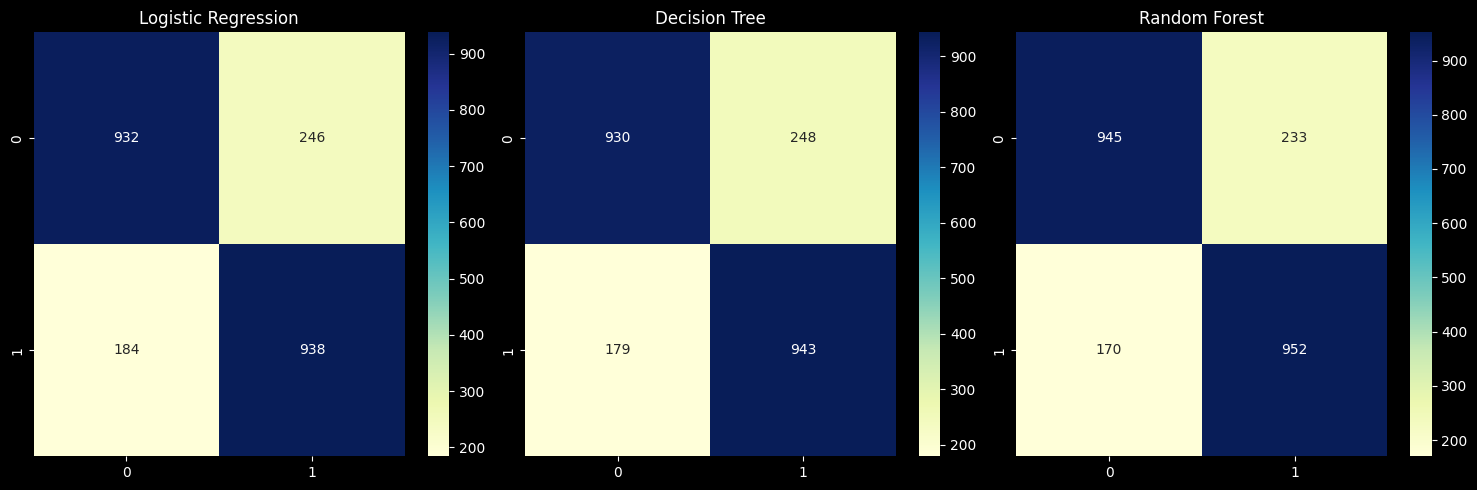

In [404]:
from sklearn import metrics

fig, ax = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)

class_names = [0, 1]
tick_marks = np.arange(len(class_names))

ax_flat = ax.flatten()

for ax_i in ax_flat:
    ax_i.set_xticks(tick_marks, class_names)
    ax_i.set_yticks(tick_marks, class_names)
    ax_i.xaxis.set_label_position('top')
    ax_i.set_ylabel('Actual label')
    ax_i.set_xlabel('Predicted label')

ax[0].set_title('Logistic Regression')
ax[1].set_title('Decision Tree')
ax[2].set_title('Random Forest')

cnf_matrix = metrics.confusion_matrix(y[ix_test], y_pred_log_reg)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g', ax=ax[0])

cnf_matrix = metrics.confusion_matrix(y[ix_test], y_pred_dt)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g', ax=ax[1])

cnf_matrix = metrics.confusion_matrix(y[ix_test], y_pred_rf)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g', ax=ax[2])


- #### Using ROC/AUC curves (instead of Precision/Recall curves since the numbers of observations for each class are equal)

In [405]:
from sklearn.metrics import roc_curve


def plot_roc_auc_curve(ax, model, X, y, linestyle, line_color, model_type):
    
    model_probs = model.predict_proba(X)   # model's probabilities
    model_probs = model_probs[:, 1]     # keeping probs only for the positive outcome
    model_fpr, model_tpr, _ = roc_curve(y, model_probs)

    ax.plot(model_fpr, model_tpr, linestyle=linestyle, color=line_color, label=model_type)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

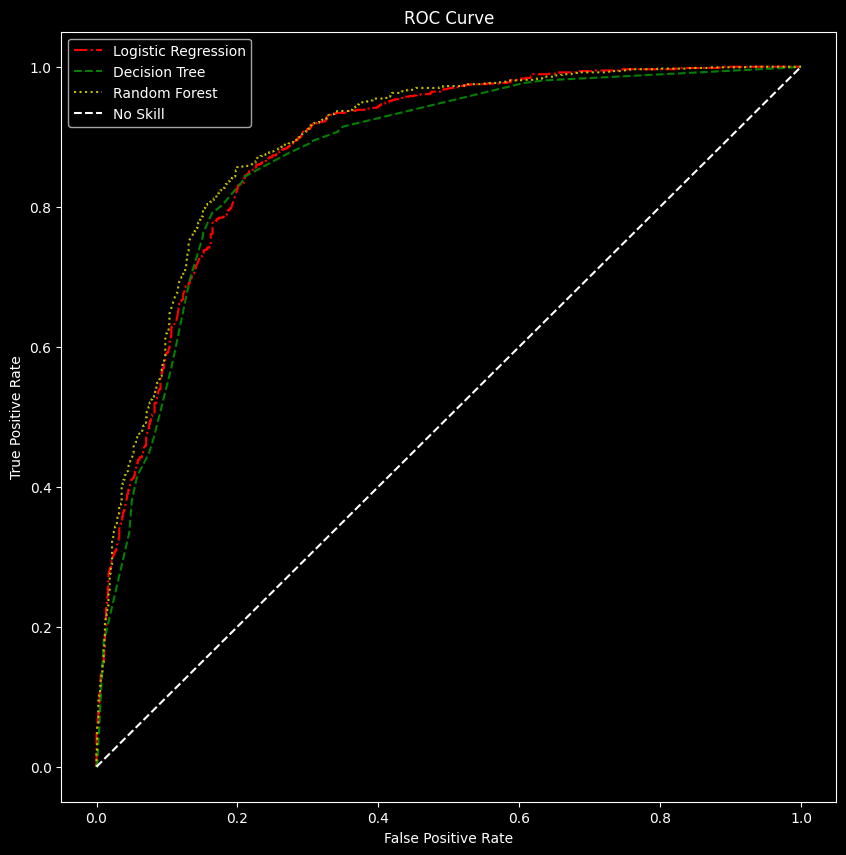

In [406]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plot_roc_auc_curve(ax, log_reg, X[ix_test], y[ix_test], '-.', 'r', 'Logistic Regression')
plot_roc_auc_curve(ax, clf, X[ix_test], y[ix_test], '--', 'g', 'Decision Tree')
plot_roc_auc_curve(ax, rf, X[ix_test], y[ix_test], ':', 'y', 'Random Forest')

ns_probs = [0 for _ in range(len(y[ix_test]))]   # no skill probabilities
ns_fpr, ns_tpr, _ = roc_curve(y[ix_test], ns_probs)

ax.plot(ns_fpr, ns_tpr, linestyle='--', color='white', label='No Skill')
ax.legend()
ax.set_title('ROC Curve')

plt.show()

## Neural Nets

In [407]:
X.shape, y.shape

((15327, 6), (15327,))

In [425]:
import tensorflow as tf
from tensorflow import keras

seq_model = keras.Sequential(
    [
          keras.layers.Input(shape=(6,)),
          keras.layers.Dense(units=720, activation="relu"),
          keras.layers.Dense(units=510, activation="relu"),
          keras.layers.Dense(units=254, activation="relu"),
          keras.layers.Dense(units=128, activation="relu"),
          keras.layers.Dense(units=64, activation="relu"),
          keras.layers.Dense(units=16, activation="relu"),
          keras.layers.Dense(units=2, activation="sigmoid"),
    ]
)

seq_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 720)               5040      
                                                                 
 dense_83 (Dense)            (None, 510)               367710    
                                                                 
 dense_84 (Dense)            (None, 254)               129794    
                                                                 
 dense_85 (Dense)            (None, 128)               32640     
                                                                 
 dense_86 (Dense)            (None, 64)                8256      
                                                                 
 dense_87 (Dense)            (None, 16)                1040      
                                                                 
 dense_88 (Dense)            (None, 2)               

In [409]:
y_onehot = pd.get_dummies(pd.Series(y)).values

In [410]:
X[ix_train].shape, y_onehot[ix_train].shape

((10728, 6), (10728, 2))

In [411]:
X[ix_dev].shape, y_onehot[ix_dev].shape

((2299, 6), (2299, 2))

In [426]:
from keras import backend as k_back

optimizer = keras.optimizers.Adam(learning_rate=0.007)

seq_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

seq_model_hist = seq_model.fit(X[ix_train], y_onehot[ix_train], epochs=10, batch_size=128, validation_data=(X[ix_dev], y_onehot[ix_dev]))

seq_model_hist

Epoch 1/10
84/84 [==============================] - 4s 23ms/step - loss: 0.4435 - accuracy: 0.8027 - val_loss: 0.4340 - val_accuracy: 0.8121
Epoch 2/10
84/84 [==============================] - 1s 16ms/step - loss: 0.4143 - accuracy: 0.8250 - val_loss: 0.4159 - val_accuracy: 0.8217
Epoch 3/10
84/84 [==============================] - 2s 27ms/step - loss: 0.4140 - accuracy: 0.8258 - val_loss: 0.4054 - val_accuracy: 0.8325
Epoch 4/10
84/84 [==============================] - 2s 24ms/step - loss: 0.4039 - accuracy: 0.8281 - val_loss: 0.4120 - val_accuracy: 0.8247
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 0.3991 - accuracy: 0.8298 - val_loss: 0.4207 - val_accuracy: 0.8243
Epoch 6/10
84/84 [==============================] - 2s 20ms/step - loss: 0.4029 - accuracy: 0.8263 - val_loss: 0.4030 - val_accuracy: 0.8251
Epoch 7/10
84/84 [==============================] - 1s 17ms/step - loss: 0.3938 - accuracy: 0.8324 - val_loss: 0.4008 - val_accuracy: 0.8256
Epoch 8/10
84

In [427]:
k_back.set_value(seq_model.optimizer.learning_rate, 0.001)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

seq_model_hist = seq_model.fit(X[ix_train], y_onehot[ix_train], initial_epoch=10, epochs=50, batch_size=64, validation_data=(X[ix_dev], y_onehot[ix_dev]), callbacks=[callback])
seq_model_hist

Epoch 11/50
  1/168 [..............................] - ETA: 2s - loss: 0.4183 - accuracy: 0.8281

168/168 [==============================] - 2s 15ms/step - loss: 0.3838 - accuracy: 0.8367 - val_loss: 0.3955 - val_accuracy: 0.8351
Epoch 12/50
168/168 [==============================] - 2s 14ms/step - loss: 0.3783 - accuracy: 0.8387 - val_loss: 0.3926 - val_accuracy: 0.8378
Epoch 13/50
168/168 [==============================] - 2s 14ms/step - loss: 0.3768 - accuracy: 0.8409 - val_loss: 0.3941 - val_accuracy: 0.8351
Epoch 14/50
168/168 [==============================] - 3s 16ms/step - loss: 0.3751 - accuracy: 0.8427 - val_loss: 0.3950 - val_accuracy: 0.8369
Epoch 15/50
168/168 [==============================] - 2s 14ms/step - loss: 0.3753 - accuracy: 0.8422 - val_loss: 0.3945 - val_accuracy: 0.8391


In [429]:
k_back.set_value(seq_model.optimizer.learning_rate, 0.0001)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

seq_model_hist = seq_model.fit(X[ix_train], y_onehot[ix_train], epochs=30, validation_data=(X[ix_dev], y_onehot[ix_dev]), callbacks=[callback])
seq_model_hist

Epoch 1/30
  1/336 [..............................] - ETA: 3s - loss: 0.3356 - accuracy: 0.8750

336/336 [==============================] - 4s 12ms/step - loss: 0.3665 - accuracy: 0.8472 - val_loss: 0.3922 - val_accuracy: 0.8356
Epoch 2/30
336/336 [==============================] - 4s 12ms/step - loss: 0.3662 - accuracy: 0.8466 - val_loss: 0.3923 - val_accuracy: 0.8347
Epoch 3/30
336/336 [==============================] - 4s 12ms/step - loss: 0.3659 - accuracy: 0.8472 - val_loss: 0.3918 - val_accuracy: 0.8360
Epoch 4/30
336/336 [==============================] - 4s 13ms/step - loss: 0.3656 - accuracy: 0.8470 - val_loss: 0.3918 - val_accuracy: 0.8369
Epoch 5/30
336/336 [==============================] - 4s 12ms/step - loss: 0.3652 - accuracy: 0.8469 - val_loss: 0.3921 - val_accuracy: 0.8373
Epoch 6/30
336/336 [==============================] - 4s 12ms/step - loss: 0.3647 - accuracy: 0.8473 - val_loss: 0.3924 - val_accuracy: 0.8360


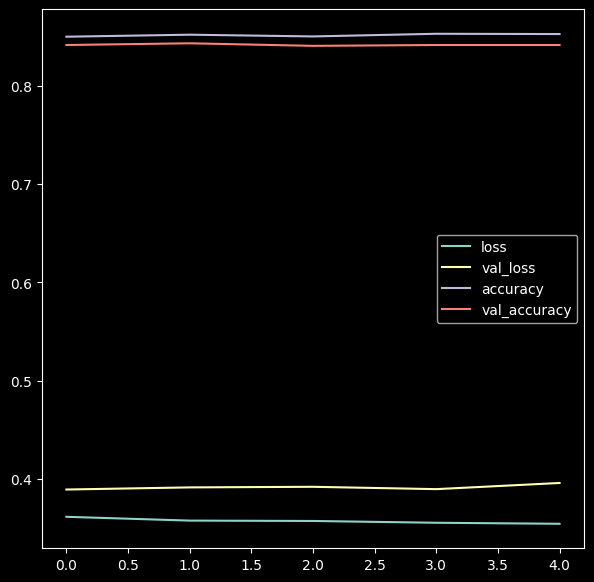

In [419]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

pd.DataFrame({
    'loss': seq_model_hist.history['loss'], 
    'val_loss': seq_model_hist.history['val_loss'],
    'accuracy': seq_model_hist.history['accuracy'],
    'val_accuracy': seq_model_hist.history['val_accuracy']
    }).plot(ax=ax)

ax.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])

In [430]:
y_pred_nt = seq_model.predict(X_v2[ix_test])

72/72 [==============================] - 0s 4ms/step


In [421]:
y_pred_nt

array([[9.9993551e-01, 4.8387847e-05],
       [9.7789556e-01, 1.9965680e-02],
       [3.5808402e-01, 6.0799885e-01],
       ...,
       [4.5788202e-02, 9.5511127e-01],
       [6.5809739e-01, 3.3761939e-01],
       [1.1878403e-01, 8.8280082e-01]], dtype=float32)

In [422]:
np.argmax(y_pred_nt, axis=1)

array([0, 0, 1, ..., 1, 0, 1])

In [432]:
print(classification_report(y[ix_test], np.argmax(y_pred_nt, axis=1), target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.86      0.81      0.83      1178
         yes       0.81      0.86      0.84      1122

    accuracy                           0.83      2300
   macro avg       0.84      0.84      0.83      2300
weighted avg       0.84      0.83      0.83      2300



In [431]:
seq_model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.39240375>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.83601564>}